In [ ]:
import os
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

: 

In [43]:
# o stands for "old"
ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/old_tools/CProf_11.root")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/CProfiles/cprofiles_integrals.root")

of = uproot.open(ofname)
f  = uproot.open(fname)

In [44]:
n = 1
oh, or0bins, oth0bins, oebins = of[f"hI3d_{n}"].to_numpy()
h ,  r0bins,  th0bins,  ebins =  f[f"I_{n}"]   .to_numpy()

# np.testing.assert_allclose(or0bins, r0bins)
# np.testing.assert_allclose(oth0bins, th0bins)

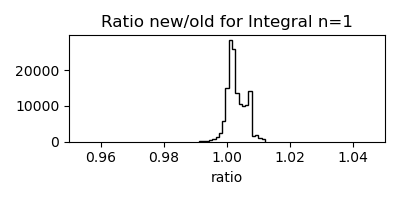

In [45]:
plt.figure(figsize=[4, 2])

plt.title(f"Ratio new/old for Integral n={n}")

plt.hist((h*(10**n)/oh).flatten(), histtype="step", bins=20, color="k")
plt.xlabel("ratio")

plt.xlim(0.95, 1.05)
plt.tight_layout()

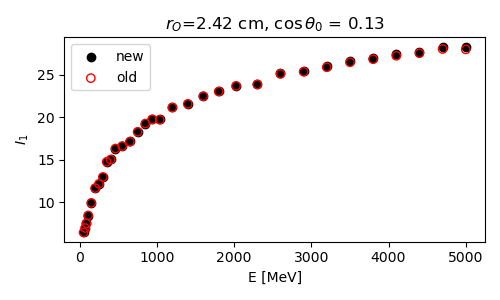

In [74]:
r0bin  = np.random.randint(len(r0bins))
th0bin = np.random.randint(len(th0bins))

plt.figure(figsize=[5, 3])

plt.title(rf"$r_O$={round(r0bins[r0bin]/10, 2)} cm, $\cos \theta_0$ = {round(th0bins[th0bin], 2)}")

es = (ebins[1:] + ebins[:-1])/2.
plt.scatter(es, h[r0bin, th0bin]*(10.**n), label="new", color="k")

#es = (oebins[1:] + oebins[:-1])/2.
plt.scatter(es, oh[r0bin, th0bin], label="old", edgecolor="red", c="none")

plt.xlabel("E [MeV]")
plt.ylabel(rf"$I_{n}$")
plt.legend()
plt.tight_layout()

In [12]:
iso , ebins  =  f["I_iso_2"] .to_numpy()
oiso, oebins = of["hI_iso_2"].to_numpy()

# np.testing.assert_allclose(oiso, iso)

In [9]:
e, nph   = f["gNphot"] .values()
oe, onph = of["gNphot"].values()

#np.testing.assert_allclose(oe, e)
#np.testing.assert_allclose(onph, nph)

In [13]:
e, sth   = f["gsthr"] .values()
oe, osth = of["gsthr"].values()

#np.testing.assert_allclose(oe, e)
#np.testing.assert_allclose(osth, sth)